# Analyse de gaz

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Chargement des jeux de données

### Le méthane

In [56]:
df_ch4 = pd.read_csv("./csv_origin/ch4_mm_gl.csv", comment="#")

Pour le gaz `CH4` (Méthane), nous avons 475 observations entre 1983 et 2023. La moyenne est exprimé en `mol`.

### Le dioxyde de carbone

In [57]:
df_co2 = pd.read_csv("./csv_origin/co2_mm_mlo.csv", comment="#")

Pour le gaz `CO2` (Dioxyde de carbone), nous avons 782 observations entre 1958 et 2023. La moyenne est exprimé en `mol`.

### Le protoxyde d'azote

In [58]:
df_n2o = pd.read_csv("./csv_origin/n2o_mm_gl.csv", comment="#")

Pour le gaz `N2O` (Protoxyde d'azote), nous avons 265 observations entre 2001 et 2023. La moyenne est exprimé en `mol`.

### L'hexafluorure de soufre

In [59]:
df_sf6 = pd.read_csv("./csv_origin/sf6_mm_gl.csv", comment="#")

Pour le gaz `SF6` (Hexafluorure de soufre), nous avons 307 observations entre 1997 et 2023. La moyenne est exprimé en `mol`.

## Conserver les variables `month` et `average`

### Le méthane

In [60]:
df_ch4 = df_ch4[["month", "average"]]

### Le dioxyde de carbone

In [61]:
df_co2 = df_co2[["month", "average"]]

### Le protoxyde d'azote

In [62]:
df_n2o = df_n2o[["month", "average"]]

### L'hexafluorure de soufre

In [63]:
df_sf6 = df_sf6[["month", "average"]]

## Présentation des gaz

### Le méthane
De sa formule chimique `CH4`, est composé d'un atome de carbone et de quatres atomes d'oxygène. C'est un gaz qui est présent à l'état naturel, et est produit par la fermentation ou la digestion des organismes vivants. Il représente 17% des gaz à effet de serre. On peut le mesurer en `nanomol/mol`. Sa masse molaire est de 16,04g/mol.

### Le dioxyde de carbone
De sa formule chimique `CO2`, est composé d'un atome de carbone et de deux atomes d'oxygène. C'est un gaz qui est présent à l'état naturel il est principalement produit par la combustion d'énergies fossiles et la déforestation tropicale. Il représente 59% des gaz à effet de serre. On peut le mesurer en `nanomol/mol`. Sa masse molaire est de 44,01g/mol.

### Le protoxyde d'azote
De sa formule chimique `N2O`, est composé d'un atome d'oxygène et de deux atomes d'azote. Il est produit par l'agriculture et l'industrie. Il représente 8,8% des gaz à effet de serre. On peut le mesurer en `nanomol/mol`. Sa masse molaire est de 44,013g/mol.

### L'hexafluorure de soufre
De sa formule chimique `SF6`, est composé dun atome de soufre et de six atomes de fluore. Il est produit par les sprays, la réfrigération et procédés industriels. Il représente moins de 1% des gaz à effet de serre. On peut le mesurer en `nanomol/mol`. Sa masse molaire est de 146,06g/mol.

## Représentation par un nuage de points

### Le méthane

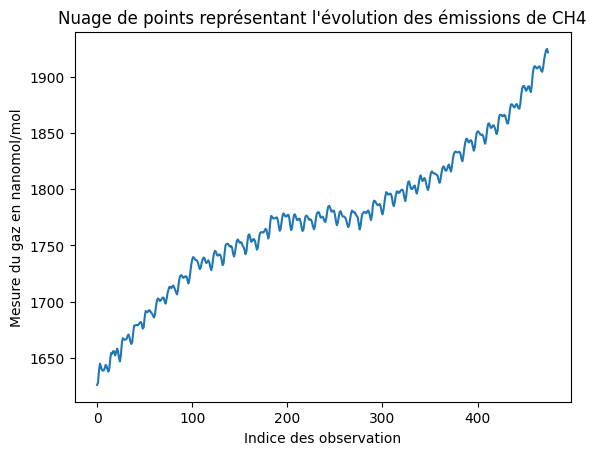

In [64]:
plt.plot(df_ch4.index, df_ch4["average"])
plt.title("Nuage de points représentant l'évolution des émissions de CH4")
plt.xlabel("Indice des observation")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.show()

On observe que ce gaz a des variations saisonnières, on constate également une augmentation d'environ 33% entre 1983 à 2023.

### Le dioxyde de carbone

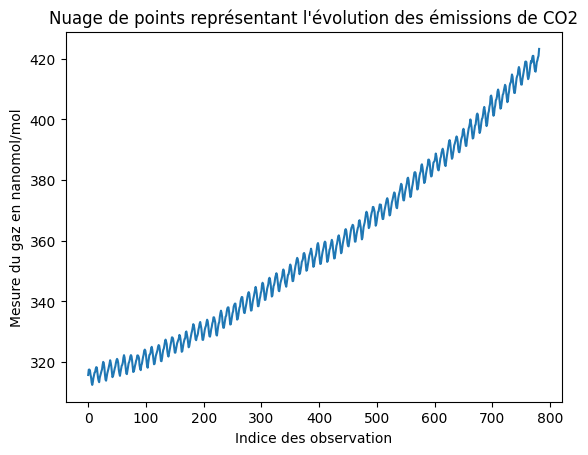

In [65]:
plt.plot(df_co2.index, df_co2["average"])
plt.title("Nuage de points représentant l'évolution des émissions de CO2")
plt.xlabel("Indice des observation")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.show()

On observe que ce gaz a des variations saisonnières, on constate également une augmentation d'environ 33% entre 1958 et 2023.

### Le protoxyde d'azote

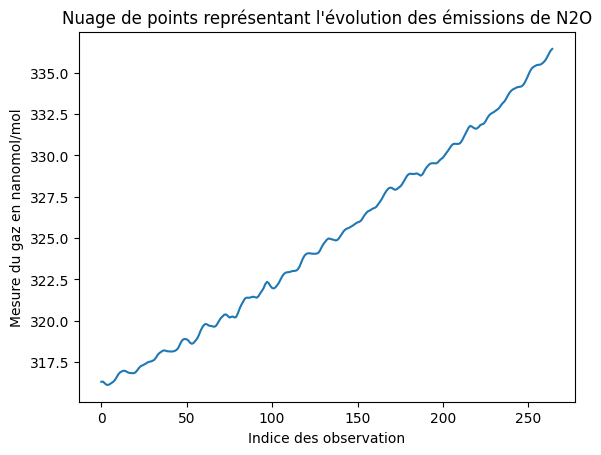

In [66]:
plt.plot(df_n2o.index, df_n2o["average"])
plt.title("Nuage de points représentant l'évolution des émissions de N2O")
plt.xlabel("Indice des observation")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.show()

On observe que ce gaz n'a pas de variations saisonnières, on constate également une augmentation d'environ 5% entre 2001 et 2023.

### L'hexafluorure de soufre

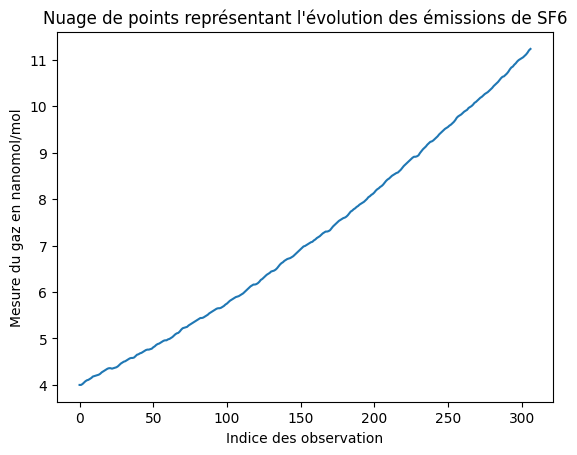

In [67]:
plt.plot(df_sf6.index, df_sf6["average"])
plt.title("Nuage de points représentant l'évolution des émissions de SF6")
plt.xlabel("Indice des observation")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.show()

On observe que ce gaz n'a pas de variations saisonnières, on constate également une augmentation d'environ 175% entre 1997 et 2023.

## Etude des variations saisonnières du `CH4` et du `CO2`

### Moyenne mobile

In [68]:
poids = np.array([0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5])

#### Le méthane

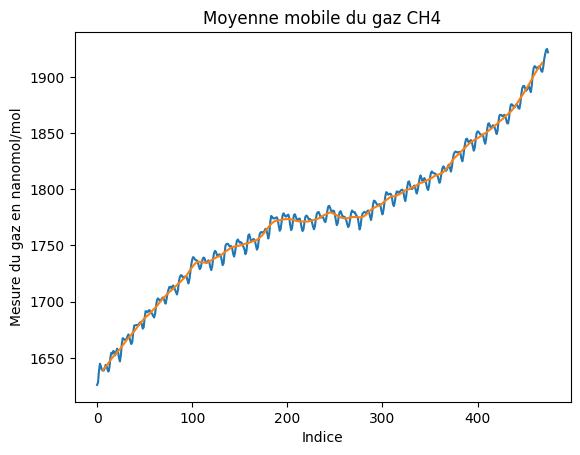

In [69]:
df_ch4["moving average"] = df_ch4["average"].rolling(13, center=True).apply(lambda x : np.sum(x*poids)/12)
plt.plot(df_ch4.index, df_ch4["average"])
plt.plot(df_ch4["moving average"])
plt.xlabel("Indice")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.title("Moyenne mobile du gaz CH4")
plt.show()

Il n'est pas possible de calculer les 6 premiers et les 6 derniers mois, car il nous manquera les données antérieures des 6 premiers mois et postérieures des 6 derniers mois. La série lissée atténue les variations et met en évidence les tendances à plus long terme dans les données. Avec la moyenne mobile, on crée une nouvelle série de données, notée 𝑥∗𝑡, où chaque point de la série est remplacé par la moyenne des 𝑛 points adjacents à ce point.

#### Le dioxyde de carbone

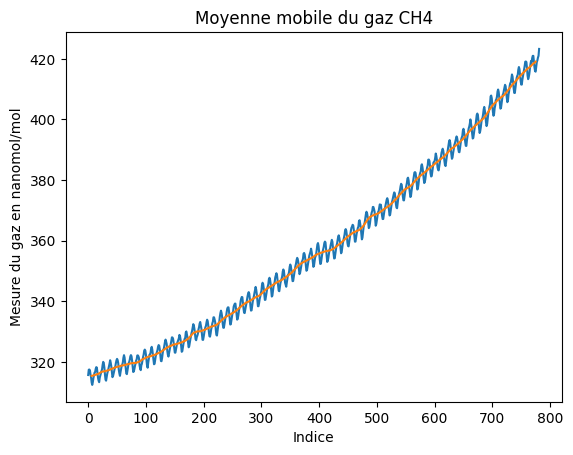

In [70]:
df_co2["moving average"] = df_co2["average"].rolling(13, center=True).apply(lambda x : np.sum(x*poids)/12)
plt.plot(df_co2.index, df_co2["average"])
plt.plot(df_co2["moving average"])
plt.xlabel("Indice")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.title("Moyenne mobile du gaz CH4")
plt.show()

Il n'est pas possible de calculer les 6 premiers et les 6 derniers mois, car il nous manquera les données antérieures des 6 premiers mois et postérieures des 6 derniers mois. La série lissée atténue les variations et met en évidence les tendances à plus long terme dans les données. Avec la moyenne mobile, on crée une nouvelle série de données, notée 𝑥∗𝑡, où chaque point de la série est remplacé par la moyenne des 𝑛 points adjacents à ce point.

### Série privée de sa série lissée

#### Le méthane

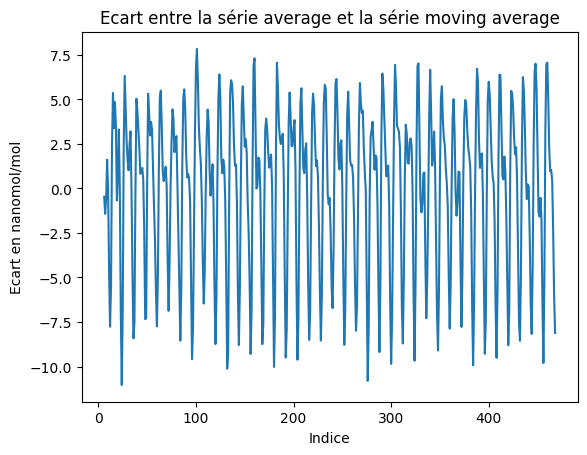

In [71]:
df_ch4["devoid series"] = df_ch4["average"] - df_ch4["moving average"]
plt.plot(df_ch4["devoid series"])
plt.ylabel("Ecart en nanomol/mol")
plt.title("Ecart entre la série average et la série moving average")
plt.xlabel("Indice")
plt.show()

Cette nouvelle série représente l'écart entre la série `average` et la série `moving average`.

#### Le dioxyde de carbone

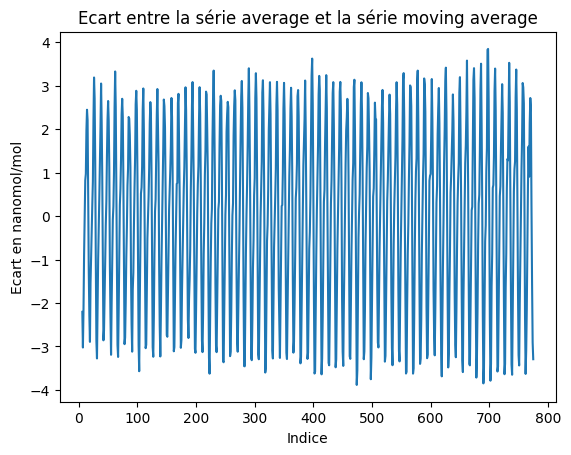

In [72]:
df_co2["devoid series"] = df_co2["average"] - df_co2["moving average"]
plt.plot(df_co2["devoid series"])
plt.ylabel("Ecart en nanomol/mol")
plt.title("Ecart entre la série average et la série moving average")
plt.xlabel("Indice")
plt.show()

Cette nouvelle série représente l'écart entre la série `average` et la série `moving average`.

### Coefficients mensuel 

#### Le méthane

In [73]:
list_monthly_coefficient_ch4 = []
for i in range(12):
    list_monthly_coefficient_ch4.append(df_ch4[df_ch4["month"]==i+1]["devoid series"].mean())
list_monthly_coefficient_ch4

[2.1440384615384573,
 1.1830235042735542,
 1.4094551282050933,
 1.2406623931624499,
 -0.9540705128205539,
 -5.399294871794924,
 -8.756527777777825,
 -6.15562500000001,
 0.5201315789474549,
 4.891831140350877,
 5.525964912280714,
 4.210372807017537]

Cette nouvelle série représente l'écart moyen entre la série `average` et la série `moving average` pour chaque mois. On obtient des valeurs positives lorsque `average` est supérieur à `moving average` et négatives dans le cas contraire.

#### Le dioxyde de carbone

In [74]:
list_monthly_coefficient_co2 = []
for i in range(12):
    list_monthly_coefficient_co2.append(df_co2[df_co2["month"]==i+1]["devoid series"].mean())
list_monthly_coefficient_co2

[0.0858984375000027,
 0.7256770833333279,
 1.4364257812499988,
 2.5789648437500023,
 3.0310416666666526,
 2.326106770833335,
 0.659641927083336,
 -1.501751302083333,
 -3.1691538461538498,
 -3.2554166666666613,
 -2.056119791666668,
 -0.8704101562499966]

Cette nouvelle série représente l'écart moyen entre la série `average` et la série `moving average` pour chaque mois. On obtient des valeurs positives lorsque `average` est supérieur à `moving average` et négatives dans le cas contraire.

### Coefficients mensuels corrigés

#### Le méthane

In [75]:
list_monthly_coefficient_ch4_corrected = []
for i in range(12):
    list_monthly_coefficient_ch4_corrected.append(list_monthly_coefficient_ch4[i] - sum(list_monthly_coefficient_ch4) / 12)
list_monthly_coefficient_ch4_corrected

[2.1557083145898885,
 1.1946933573249854,
 1.4211249812565245,
 1.252332246213881,
 -0.9424006597691226,
 -5.387625018743492,
 -8.744857924726393,
 -6.143955146948579,
 0.5318014319988862,
 4.903500993402309,
 5.537634765332146,
 4.2220426600689684]

#### Le dioxyde de carbone

In [76]:
list_monthly_coefficient_co2_corrected = []
for i in range(12):
    list_monthly_coefficient_co2_corrected.append(list_monthly_coefficient_co2[i] - sum(list_monthly_coefficient_co2) / 12)
list_monthly_coefficient_co2_corrected

[0.08665637520032395,
 0.7264350210336492,
 1.43718371895032,
 2.5797227814503234,
 3.0317996043669737,
 2.3268647085336562,
 0.6603998647836573,
 -1.5009933643830118,
 -3.1683959084535287,
 -3.2546587289663402,
 -2.055361853966347,
 -0.8696522185496753]

### Série corrigée des variations saisonnières

#### Le méthane

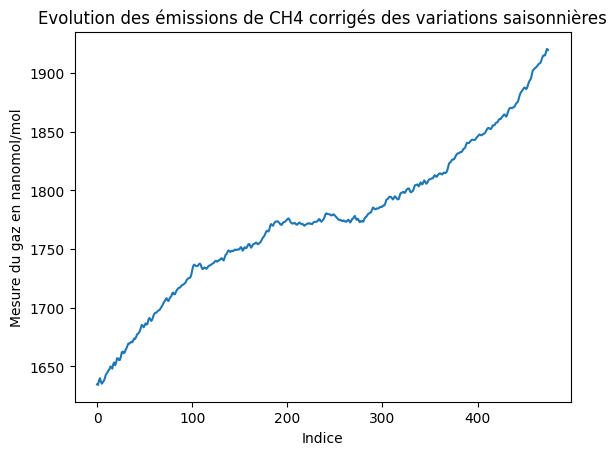

In [77]:
corrected_series_ch4 = []
for i, value in enumerate(df_ch4["month"]):
    corrected_series_ch4.append(df_ch4["average"][i] - list_monthly_coefficient_ch4_corrected[df_ch4["month"][i] - 1])
df_ch4["corrected series"] = corrected_series_ch4
plt.plot(df_ch4["corrected series"])
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Evolution des émissions de CH4 corrigés des variations saisonnières")
plt.show()

Cette série représente l'évolution des émissions de `CH4` sans les variations saisonnières.

#### Le dioxyde de carbone

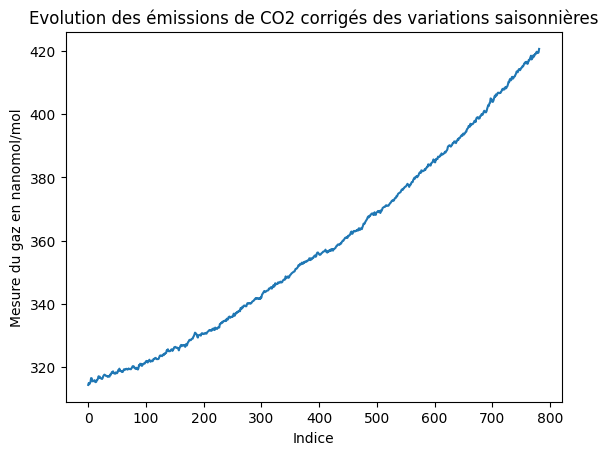

In [78]:
corrected_series_co2 = []
for i, value in enumerate(df_co2["month"]):
    corrected_series_co2.append(df_co2["average"][i] - list_monthly_coefficient_co2_corrected[df_co2["month"][i] - 1])
df_co2["corrected series"] = corrected_series_co2
plt.plot(df_co2["corrected series"])
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Evolution des émissions de CO2 corrigés des variations saisonnières")
plt.show()

Cette série représente l'évolution des émissions de `C02` sans les variations saisonnières.

### Equation de la droite de régression de la série corrigée des variations saisonnières

#### Le méthane

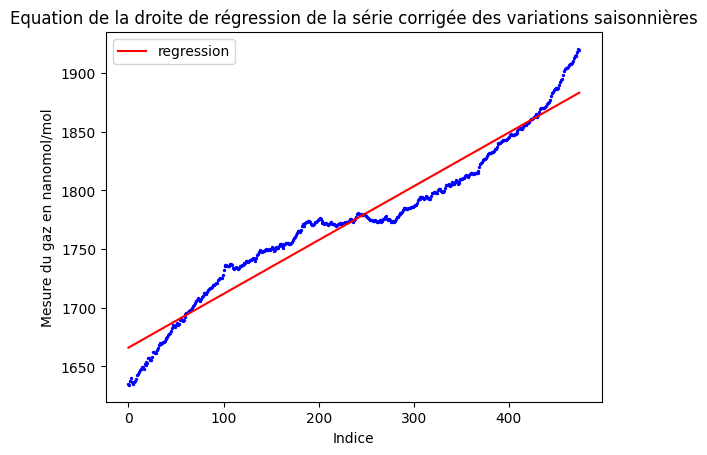

In [79]:
df_ch4["index"] = df_ch4.index
beta_1_ch4 = df_ch4.cov()["index"]["corrected series"] / df_ch4["index"].var()
beta_0_ch4 = df_ch4["corrected series"].mean() - beta_1_ch4 * df_ch4["index"].mean()
def f_ch4(x):
    return beta_0_ch4 + beta_1_ch4 * x
df_linear_regression = pd.concat([df_ch4["index"], pd.DataFrame(np.array(list(map(f_ch4, df_ch4["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_ch4.plot.scatter( x = "index", y = "corrected series", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression de la série corrigée des variations saisonnières")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

On observe une tendance croissante, cette tendance correspond à l'évolution globale des émissions de `CH4`. Cela permet de prédire l'évolution de ce dernier à l'avenir.

#### Le dioxyde de carbone

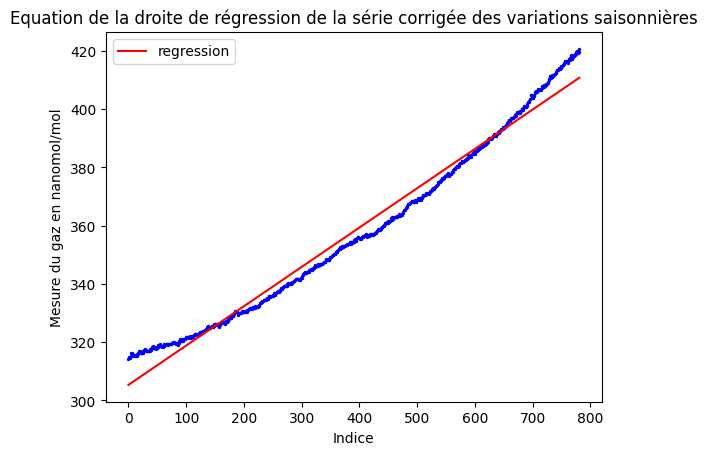

In [80]:
df_co2["index"] = df_co2.index
beta_1_co2 = df_co2.cov()["index"]["corrected series"] / df_co2["index"].var()
beta_0_co2 = df_co2["corrected series"].mean() - beta_1_co2 * df_co2["index"].mean()
def f_co2(x):
    return beta_0_co2 + beta_1_co2 * x
df_linear_regression = pd.concat([df_co2["index"], pd.DataFrame(np.array(list(map(f_co2, df_co2["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_co2.plot.scatter( x = "index", y = "corrected series", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression de la série corrigée des variations saisonnières")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

On observe une tendance croissante, cette tendance correspond à l'évolution globale des émissions de `CO2`. Cela permet de prédire l'évolution de ce dernier à l'avenir.

### Prévisions

#### Le méthane

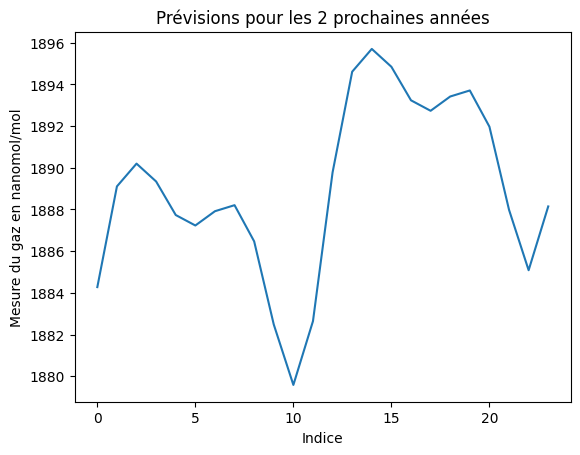

In [81]:
forecasts = []
for i in range(475, 499):
    forecasts.append(f_ch4(i) + list_monthly_coefficient_ch4_corrected[(i + 1) % 12])
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

La méthode de prévision prend en compte les variations saisonnières, en suivant l'évolution de la "tendance".

#### Le dioxyde de carbone

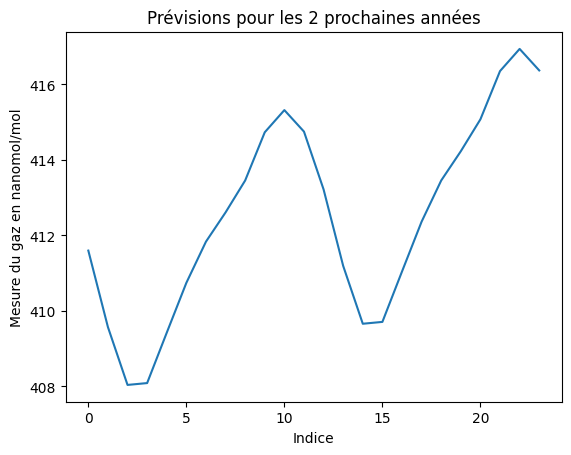

In [82]:
forecasts = []
for i in range(782, 806):
    forecasts.append(f_co2(i) + list_monthly_coefficient_co2_corrected[(i + 4) % 12])
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

La méthode de prévision prend en compte les variations saisonnières, en suivant l'évolution de la "tendance".

### A quoi peuvent être dues les variations saisonnières observées ?

#### Le méthane

Les variations saisonnières du méthane peuvent être dues à l'activité biologique (la fermentation dans les marées, les rizières et les termites) mais aussi à la température et à l'ensoleillement ou encore l'hydrologie (précipitation et niveau de nappe phréatique) et bien sûr l'activité humaine (agriculture, élevage et exploitation des combustibles fossiles).

#### Le dioxyde de carbone

Les variations saisonnières du dioxyde de carbone peuvent être dues à la photosynthèse et à la respiration des plantes. Pendant la saison de croissance, les plantes absorbent le CO2 de l'atmosphère pour la photosynthèse, réduisant ainsi les niveaux de CO2. Au contraire, pendant les mois d'hiver ou les saisons de dormance, lorsque la photosynthèse est réduite, les plantes respirent et libèrent du CO2, ce qui entraîne une augmentation des niveaux. Les activités humaines, telles que la combustion de combustibles fossiles (charbon, pétrole, gaz naturel) pour la production d'énergie, le transport et l'industrie, sont la principale cause de l'augmentation à long terme des niveaux de CO2 dans l'atmosphère. Cependant, les variations saisonnières dues à ces activités sont généralement moins prononcées que les facteurs naturels.

## Décomposition de `average`

### Série lissée

Nous avons avons déjà calculé la série lissée du méthane et du dioxyde de carbone.

### Série divisée

#### Le méthane

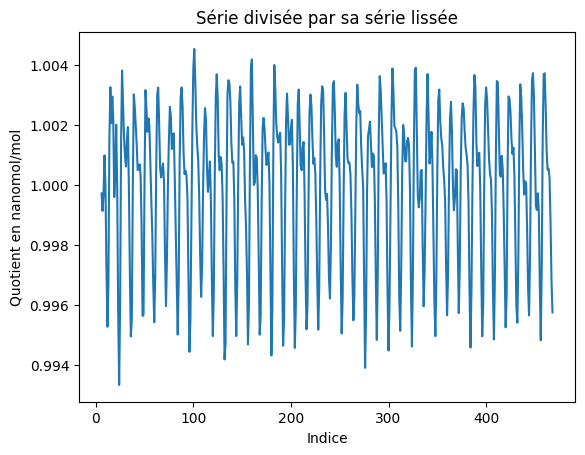

In [83]:
df_ch4["divide series"] = df_ch4["average"] / df_ch4["moving average"]
plt.plot(df_ch4["divide series"])
plt.ylabel("Quotient en nanomol/mol")
plt.xlabel("Indice")
plt.title("Série divisée par sa série lissée")
plt.show()

Cette nouvelle série représente la proportion entre les valeurs individuelles de la série originale et les valeurs moyennes lissées correspondantes. Elle permet d'observer comment chaque valeur individuelle se compare à la tendance générale de la série.

#### Le dioxyde de carbone

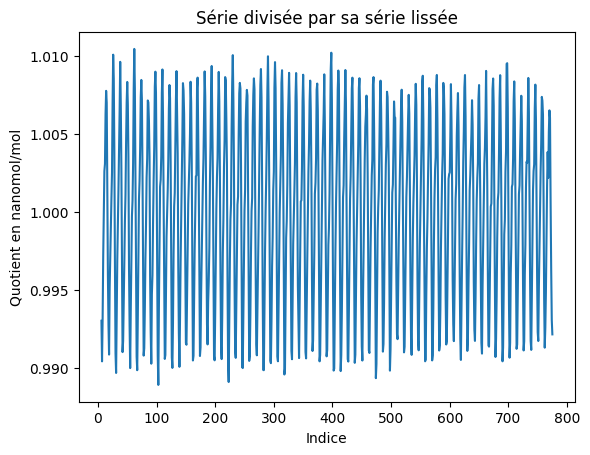

In [84]:
df_co2["divide series"] = df_co2["average"] / df_co2["moving average"]
plt.plot(df_co2["divide series"])
plt.ylabel("Quotient en nanomol/mol")
plt.xlabel("Indice")
plt.title("Série divisée par sa série lissée")
plt.show()

Cette nouvelle série représente la proportion entre les valeurs individuelles de la série originale et les valeurs moyennes lissées correspondantes. Elle permet d'observer comment chaque valeur individuelle se compare à la tendance générale de la série.

### Coefficients mensuels

#### Le méthane

In [85]:
list_monthly_coefficient_ch4 = []
for i in range(12):
    list_monthly_coefficient_ch4.append(df_ch4[df_ch4["month"]==i+1]["divide series"].mean())
list_monthly_coefficient_ch4

[1.0012115589807689,
 1.0006680595815682,
 1.0007969545497324,
 1.000706065311508,
 0.9994697378141384,
 0.9969635622455336,
 0.9950667778423223,
 0.9965201265973743,
 1.000289332533237,
 1.002755018198942,
 1.003107027535138,
 1.0023701433944636]

Cette nouvelle série représente la moyenne des proportions entre les valeurs individuelles de la série originale et les valeurs moyennes lissées correspondantes. On obtient une valeur supérieur à 1 lorsque `moving average` est inférieur à `average` et inférieur à 1 dans le cas contraire.

#### Le dioxyde de carbone

In [86]:
list_monthly_coefficient_co2 = []
for i in range(12):
    list_monthly_coefficient_co2.append(df_co2[df_co2["month"]==i+1]["divide series"].mean())
list_monthly_coefficient_co2

[1.000202916715647,
 1.002003975953658,
 1.0040201732914311,
 1.0072205610389395,
 1.0084916698250321,
 1.0065291147215256,
 1.0018990554505625,
 0.9958436941474892,
 0.9911394592049957,
 0.9908703819299439,
 0.9942082689942238,
 0.9975300199839654]

Cette nouvelle série représente la moyenne des proportions entre les valeurs individuelles de la série originale et les valeurs moyennes lissées correspondantes. On obtient une valeur supérieur à 1 lorsque `moving average` est inférieur à `average` et inférieur à 1 dans le cas contraire.

### Coefficients mensuels corrigés

#### Le méthane 

In [87]:
list_monthly_coefficient_ch4_corrected = []
for i in range(12):
    list_monthly_coefficient_ch4_corrected.append(list_monthly_coefficient_ch4[i] / (sum(list_monthly_coefficient_ch4) / 12))
list_monthly_coefficient_ch4_corrected

[1.0012178696082144,
 1.000674366783342,
 1.00080326256393,
 1.0007123727528315,
 0.9994760374629008,
 0.9969698460978941,
 0.9950730497392677,
 0.9965264076547639,
 1.0002956373478975,
 1.002761338554797,
 1.0031133501097047,
 1.0023764613244563]

#### Le dioxyde de carbone 

In [88]:
list_monthly_coefficient_co2_corrected = []
for i in range(12):
    list_monthly_coefficient_co2_corrected.append(list_monthly_coefficient_co2[i] / (sum(list_monthly_coefficient_co2) / 12))
list_monthly_coefficient_co2_corrected

[1.0002063098107468,
 1.0020073751586833,
 1.0040235793362178,
 1.007223977940743,
 1.0084950910389536,
 1.0065325292776621,
 1.0019024542996546,
 0.995847072454333,
 0.9911428215531614,
 0.99087374336529,
 0.9942116417530403,
 0.9975334040115124]

### Série corrigée des variations saisonnières

#### Le méthane

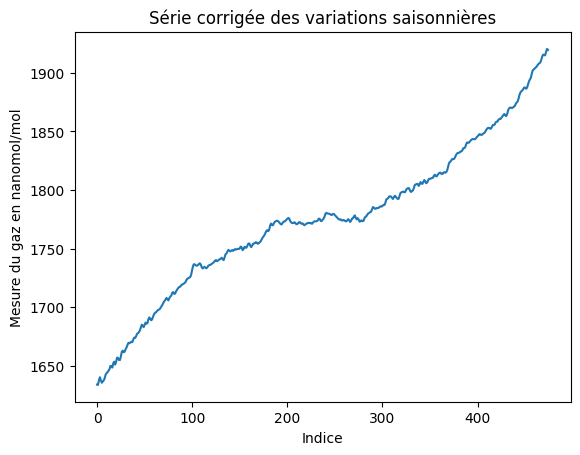

In [89]:
corrected_series_ch4 = []
for i in range(475):
    corrected_series_ch4.append(df_ch4["average"][i] / list_monthly_coefficient_ch4_corrected[(i + 6) % 12])
df_ch4["corrected series v2"] = pd.DataFrame(corrected_series_ch4, columns=["corrected series"])
plt.plot(df_ch4["corrected series v2"])
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Série corrigée des variations saisonnières")
plt.show()

Cette série représente l'évolution des émissions de `CH4` sans les variations saisonnières.

#### Le dioxyde de carbone

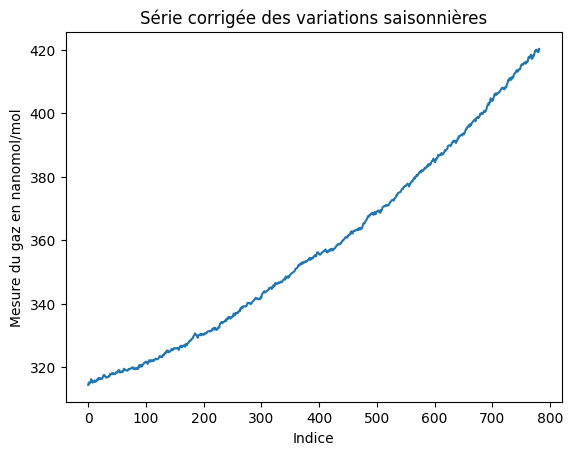

In [90]:
corrected_series_co2 = []
for i in range(782):
    corrected_series_co2.append(df_co2["average"][i] / list_monthly_coefficient_co2_corrected[(i + 2) % 12])
df_co2["corrected series v2"] = pd.DataFrame(corrected_series_co2, columns=["corrected series"])
plt.plot(df_co2["corrected series v2"])
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Série corrigée des variations saisonnières")
plt.show()

Cette série représente l'évolution des émissions de `CO2` sans les variations saisonnières.

### Calcul de la tendance

#### Le méthane

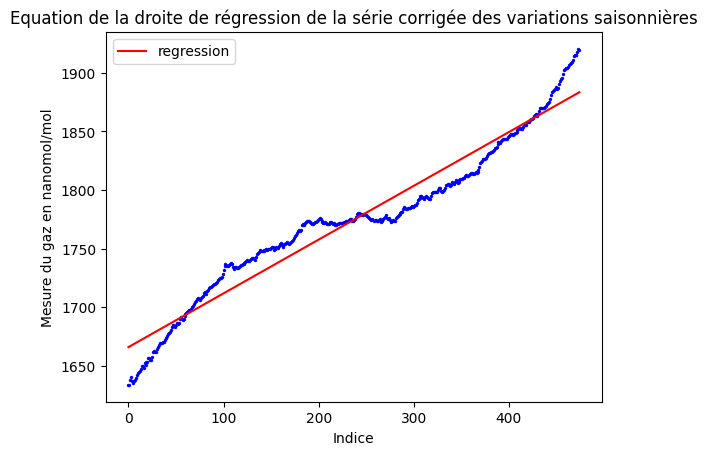

In [91]:
beta_1_ch4 = df_ch4.cov()["index"]["corrected series v2"] / df_ch4["index"].var()
beta_0_ch4 = df_ch4["corrected series"].mean() - beta_1_ch4 * df_ch4["index"].mean()
def f_ch4(x):
    return beta_0_ch4 + beta_1_ch4 * x
df_linear_regression = pd.concat([df_ch4["index"], pd.DataFrame(np.array(list(map(f_ch4, df_ch4["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_ch4.plot.scatter( x = "index", y = "corrected series v2", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression de la série corrigée des variations saisonnières")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

#### Le dioxyde de carbone

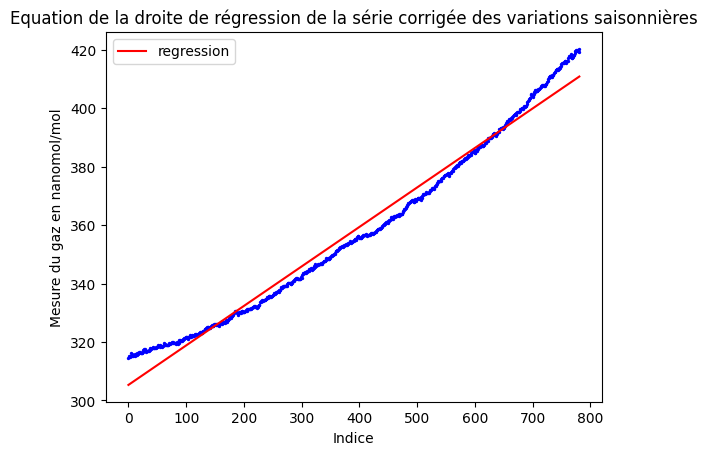

In [92]:
beta_1_co2 = df_co2.cov()["index"]["corrected series v2"] / df_co2["index"].var()
beta_0_co2 = df_co2["corrected series"].mean() - beta_1_co2 * df_co2["index"].mean()
def f_co2(x):
    return beta_0_co2 + beta_1_co2 * x
df_linear_regression = pd.concat([df_co2["index"], pd.DataFrame(np.array(list(map(f_co2, df_co2["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_co2.plot.scatter( x = "index", y = "corrected series v2", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression de la série corrigée des variations saisonnières")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

### Prévisions

#### Le méthane

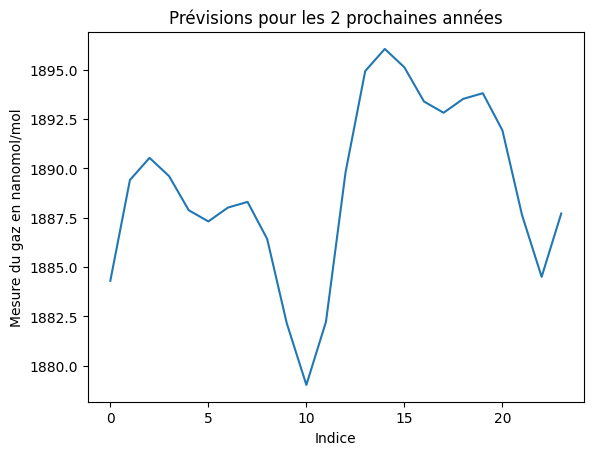

In [93]:
forecasts = []
for i in range(475, 499):
    forecasts.append(f_ch4(i) * list_monthly_coefficient_ch4_corrected[(i + 1) % 12])
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

La méthode de prévision prend en compte les variations saisonnières, en suivant l'évolution de la "tendance".

#### Le dioxyde de carbone

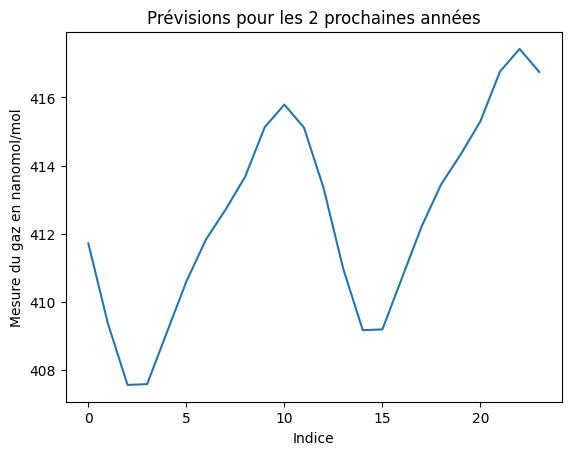

In [94]:
forecasts = []
for i in range(782, 806):
    forecasts.append(f_co2(i) * list_monthly_coefficient_co2_corrected[(i + 4) % 12])
pd.DataFrame(forecasts, columns=["forecasts"])
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

La méthode de prévision prend en compte les variations saisonnières, en suivant l'évolution de la "tendance".

## Comparatif des démarches

Les 2 démarches donnent les mêmes résultats avec une approche différente. Il n'y a donc pas de démarche plus pertinente que l'autre.

## Analyse des 2 autres gaz

### Coefficient de corrélation

In [95]:
df_n2o["average"].corr(df_sf6["average"])

0.9990106319081234

### Droite de régression

#### Le protoxyde d'azote

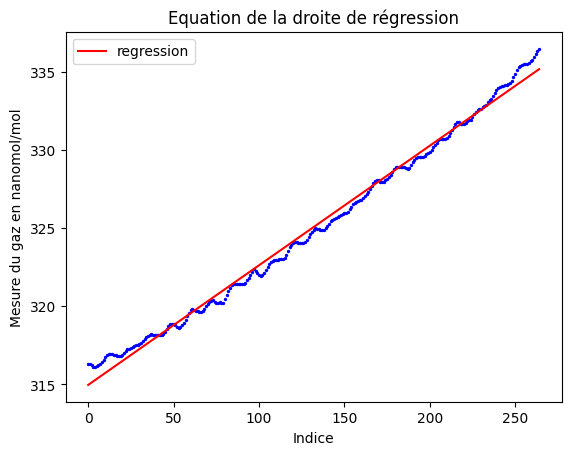

In [96]:
df_n2o["index"] = df_n2o.index
beta_1_n2o = df_n2o.cov()["index"]["average"] / df_n2o["index"].var()
beta_0_n2o = df_n2o["average"].mean() - beta_1_n2o * df_n2o["index"].mean()
def f_n2o(x):
    return beta_0_n2o + beta_1_n2o * x
df_linear_regression = pd.concat([df_n2o["index"], pd.DataFrame(np.array(list(map(f_n2o, df_n2o["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_n2o.plot.scatter( x = "index", y = "average", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

#### L'hexafluorure de soufre

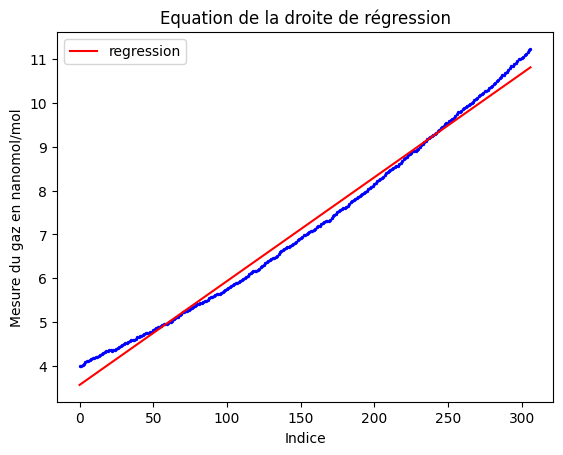

In [97]:
df_sf6["index"] = df_sf6.index
beta_1_sf6 = df_sf6.cov()["index"]["average"] / df_sf6["index"].var()
beta_0_sf6 = df_sf6["average"].mean() - beta_1_sf6 * df_sf6["index"].mean()
def f_sf6(x):
    return beta_0_sf6 + beta_1_sf6 * x
df_linear_regression = pd.concat([df_sf6["index"], pd.DataFrame(np.array(list(map(f_sf6, df_sf6["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_sf6.plot.scatter( x = "index", y = "average", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

### Prévisions

#### Le protoxyde d'azote

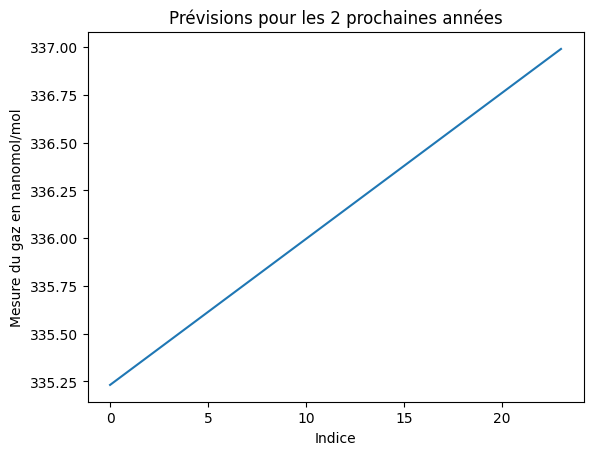

In [98]:
forecasts = []
for i in range(265, 289):
    forecasts.append(f_n2o(i))
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

#### L'hexafluorure de soufre

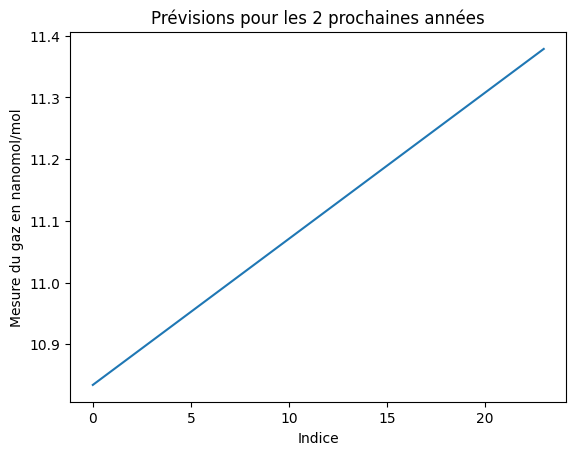

In [99]:
forecasts = []
for i in range(307, 331):
    forecasts.append(f_sf6(i))
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

### Régression exponentielle

#### Le protoxyde d'azote

#### L'hexafluorure de soufre

## Etude par année

In [100]:
df_ch4 = pd.read_csv("./csv_origin/ch4_mm_gl.csv", comment="#")
df_co2 = pd.read_csv("./csv_origin/co2_mm_mlo.csv", comment="#")

### Nouveau dataset par année

#### Le méthane

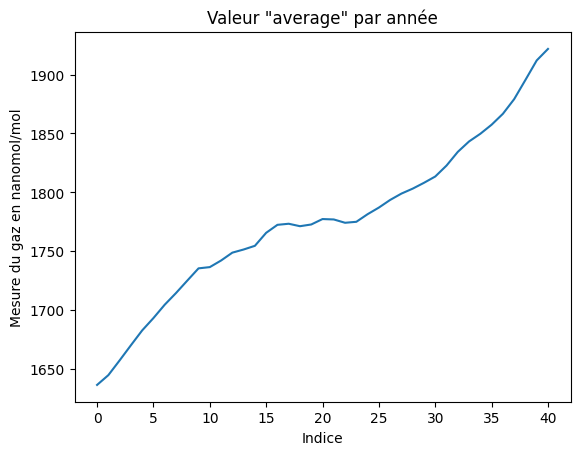

In [101]:
df_ch4_grouped = df_ch4.groupby("year")["average"].mean()
df_ch4_grouped = df_ch4_grouped.reset_index()
plt.plot(df_ch4_grouped["average"])
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Valeur \"average\" par année")
plt.show()

#### Le dioxyde de carbone

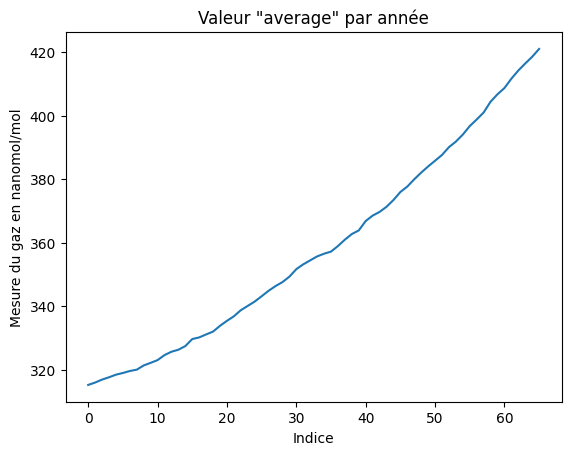

In [102]:
df_co2_grouped = df_co2.groupby("year")["average"].mean()
df_co2_grouped = df_co2_grouped.reset_index()
plt.plot(df_co2_grouped["average"])
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Valeur \"average\" par année")
plt.show()

### Coefficient de correlation

In [103]:
df_ch4_grouped["average"].corr(df_co2_grouped["average"])

0.9603406695848214

### Droite de régression

#### Le protoxyde d'azote

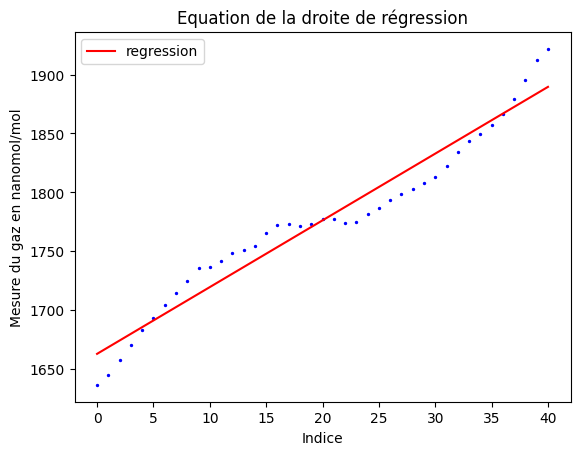

In [104]:
df_ch4_grouped["index"] = df_ch4_grouped.index
beta_1_ch4 = df_ch4_grouped.cov()["index"]["average"] / df_ch4_grouped["index"].var()
beta_0_ch4 = df_ch4_grouped["average"].mean() - beta_1_ch4 * df_ch4_grouped["index"].mean()
def f_ch4_grouped(x):
    return beta_0_ch4 + beta_1_ch4 * x
df_linear_regression = pd.concat([df_ch4_grouped["index"], pd.DataFrame(np.array(list(map(f_ch4_grouped, df_ch4_grouped["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_ch4_grouped.plot.scatter(x = "index", y = "average", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

#### L'hexafluorure de soufre

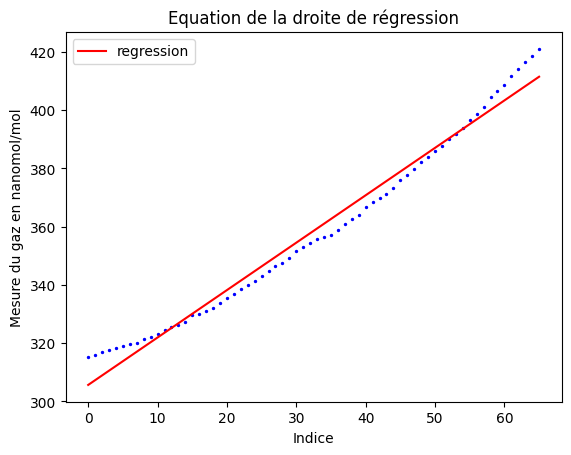

In [105]:
df_co2_grouped["index"] = df_co2_grouped.index
beta_1_co2 = df_co2_grouped.cov()["index"]["average"] / df_co2_grouped["index"].var()
beta_0_co2 = df_co2_grouped["average"].mean() - beta_1_co2 * df_co2_grouped["index"].mean()
def f_co2_grouped(x):
    return beta_0_co2 + beta_1_co2 * x
df_linear_regression = pd.concat([df_co2_grouped["index"], pd.DataFrame(np.array(list(map(f_co2_grouped, df_co2_grouped["index"]))), columns=["regression"])], axis=1)
fig, ax = plt.subplots()
df_co2_grouped.plot.scatter(x = "index", y = "average", s = 2, ax = ax, color = "blue")
df_linear_regression.plot.line(x = "index", y = "regression", color = "red", ax = ax)
plt.title("Equation de la droite de régression")
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.show()

### Prévisions

#### Le méthane

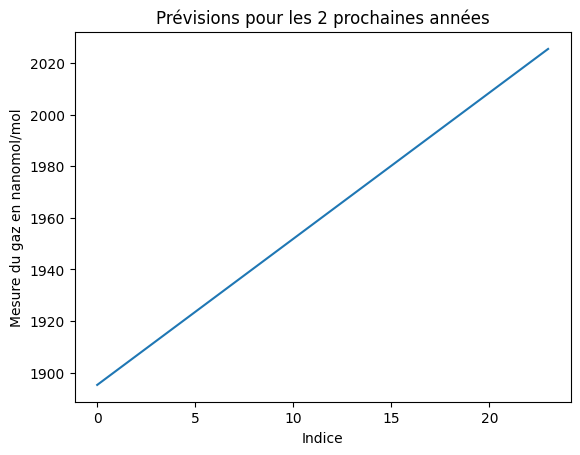

In [106]:
forecasts = []
for i in range(41, 65):
    forecasts.append(f_ch4_grouped(i))
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

#### Le dioxyde de carbone

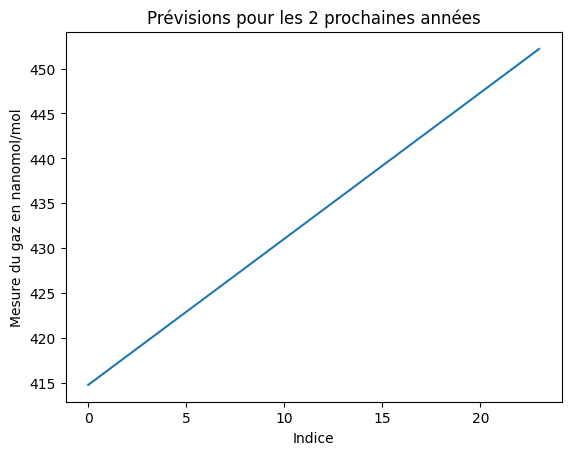

In [108]:
forecasts = []
for i in range(67, 91):
    forecasts.append(f_co2_grouped(i))
plt.plot(pd.DataFrame(forecasts, columns=["forecasts"]))
plt.ylabel("Mesure du gaz en nanomol/mol")
plt.xlabel("Indice")
plt.title("Prévisions pour les 2 prochaines années")
plt.show()

### Régression exponentielle

#### Le méthane

#### Le dioxyde de carbone